In [1]:
from Src.Entities.Analyzing import run_experiment_and_save_plot, Ks
from Src.Entities.LogisticRegressionRules import train_logistic_regression, logistic_regression_for_game_object
%load_ext autoreload
%autoreload 2
from Src.Entities.EvaluationMeasures import evaluate_normal_cumulative_gain
from Src.Entities.RuleParameters import RuleParameters

from Src.Saving.Saving import create_directory_path_if_not_exists, save_data_with_rules, prepare_thresholds_for, \
    save_brute_generated_data
from Src.TestDataGeneration.BruteTestDataGenerator import BruteTestDataGenerator
from Src.TestDataGeneration.TestTagsCreator import create_tags 

brute_generator = BruteTestDataGenerator()

In [2]:
rule_parameters = RuleParameters()
rule_parameters.k_mn = 2
rule_parameters.k_mx = 3
rule_parameters.s_mn = 0.05
rule_parameters.s_mx = 0.1
rule_parameters.c_mn = 0.8
rule_parameters.c_mx = 1

TAG_CATEGORIES_COUNT = 30
TAG_NAMES_COUNT = 50

RULES_COUNT = 10
SEEDS_COUNT = 1

base_directory = f"OUTPUT/LogisticRegressionAnalyzing/"
create_directory_path_if_not_exists(base_directory)

'OUTPUT/LogisticRegressionAnalyzing/'

In [3]:

def analyze(seed, noise_cover, game_object_count, c):
    # generate data
    
    tags = create_tags(seed, TAG_CATEGORIES_COUNT, TAG_NAMES_COUNT)
    game_objects, expected_rules = brute_generator.generate_without_interference(
        seed=seed,
        tags=tags,
        game_objects_count=game_object_count,
        R_mn = RULES_COUNT,
        R_mx = RULES_COUNT,
        rule_parameters=rule_parameters,
        noise_cover=noise_cover
    )   
    
    # save generated data
    #save_brute_generated_data(base_directory_path, seed, tags, rule_parameters, game_objects, expected_rules, noise_cover)
    
    # run and save
    model = train_logistic_regression(game_objects, C=c, solver='newton-cg')
    
    scores, ranking = evaluate_normal_cumulative_gain(Ks, expected_rules, game_object_count,
                        lambda game_object, k: logistic_regression_for_game_object(game_object, k, model))
    
    return scores

c:\users\adams\appdata\local\programs\python\python38\lib\site-packages\xarray\core\indexing.py:1281: ComplexWarning: Casting complex values to real discards the imaginary part
  array[key] = value
c:\users\adams\appdata\local\programs\python\python38\lib\site-packages\xarray\core\indexing.py:1281: ComplexWarning: Casting complex values to real discards the imaginary part
  array[key] = value
c:\users\adams\appdata\local\programs\python\python38\lib\site-packages\xarray\core\indexing.py:1281: ComplexWarning: Casting complex values to real discards the imaginary part
  array[key] = value
c:\users\adams\appdata\local\programs\python\python38\lib\site-packages\xarray\core\indexing.py:1281: ComplexWarning: Casting complex values to real discards the imaginary part
  array[key] = value
c:\users\adams\appdata\local\programs\python\python38\lib\site-packages\xarray\core\indexing.py:1281: ComplexWarning: Casting complex values to real discards the imaginary part
  array[key] = value
c:\users\a

Progress: 0/5 (0.0%)
Progress: 1/5 (20.0%)
Progress: 2/5 (40.0%)
Progress: 3/5 (60.0%)
Progress: 4/5 (80.0%)
COMPLETED


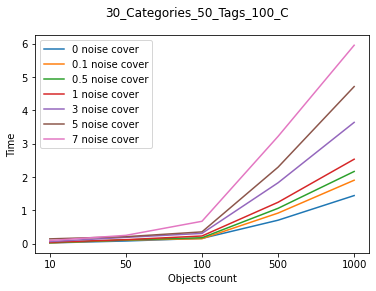

In [4]:
cs = [0.01, 0.1, 1, 10, 100]

ALL_COUNT = len(cs)
iteration = 0

for c in cs:    
    c_string = f"{c}".replace(".", "_")
    plot_title = f"{TAG_CATEGORIES_COUNT}_Categories_{TAG_NAMES_COUNT}_Tags_{c_string}_C"
    
    run_experiment_and_save_plot(base_directory, SEEDS_COUNT, lambda s, nc, go: analyze(s, nc, go, c), plot_title)
    
    print(f"Progress: {iteration}/{ALL_COUNT} ({iteration/ALL_COUNT*100}%)")
    iteration += 1
            
print(f"COMPLETED")